# 🏠 House Price Prediction Using XGBoost Regressor
> Based on real-world Melbourne housing data (https://example.com/xgboost-house-price)

## 📚 Table of Contents
1. [Import Libraries](#1-import-libraries)
2. [Load Dataset](#2-load-dataset)
3. [Data Preprocessing](#3-data-preprocessing)
4. [Exploratory Data Analysis (EDA)](4-exploratory-data-analysis-eda)
5. [Train/Test Split](#5-traintest-split)
6. [Model Training with XGBoost](#6-model-training-with-xgboost)
7. [Model Evaluation](#7-model-evaluation)
8. [Visualize Predictions](#8-visualize-predictions)
9. [Feature Importance](#9-feature-importance)
10. [Make Predictions](#10-make-predictions)
11. [Save Model](#11-save-model)

## 1. Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

## 2. Load Dataset

In [14]:
# Replace with your local path or download from GitHub
df = pd.read_csv(r"D:\01-DATA\MELBOURNE_HOUSE_PRICES_LESS.csv")

# Display first few rows
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


## 3. Data Preprocessing

In [15]:
# Check column names
print("Available columns:", df.columns.tolist())

# Drop irrelevant columns
df = df.drop(['Method', 'Regionname'], axis=1)



# Encode categorical variable 'Type'
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

# Define feature set (only existing columns)
features = ['Rooms', 'Type', 'Postcode', 'Distance', 'Propertycount']


# Drop missing values
df_clean = df.dropna()

# Select features and target
X = df_clean[features]
y = df_clean['Price']

Available columns: ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea']


## 4. Exploratory Data Analysis (EDA)

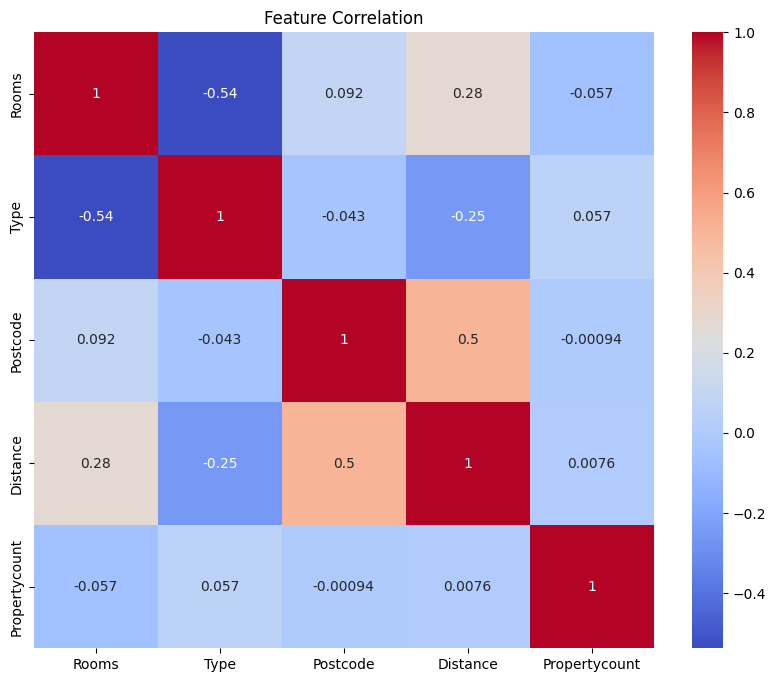

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

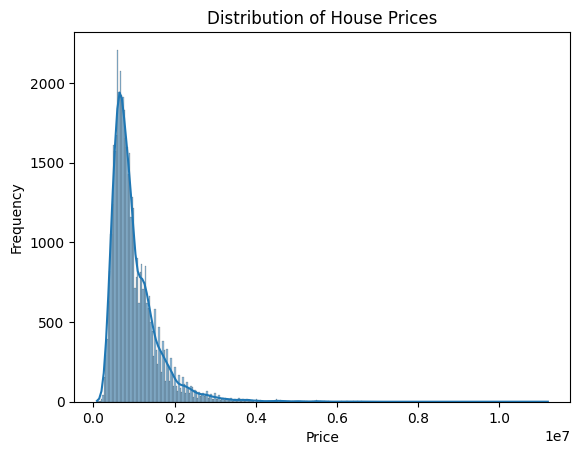

In [17]:
sns.histplot(y, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

## 5. Train/Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Model Training with XGBoost

In [19]:
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.7,
    random_state=42
)
_= model.fit(X_train, y_train)

## 7. Model Evaluation

In [20]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 98482166907.61467
R² Score: 0.7125168414787908


## 8. Visualize Predictions

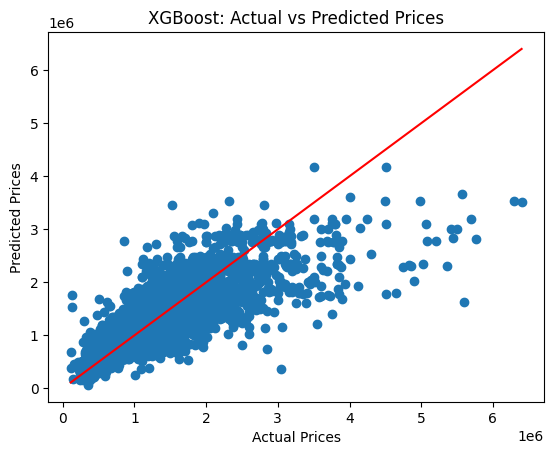

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("XGBoost: Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

## 9. Feature Importance

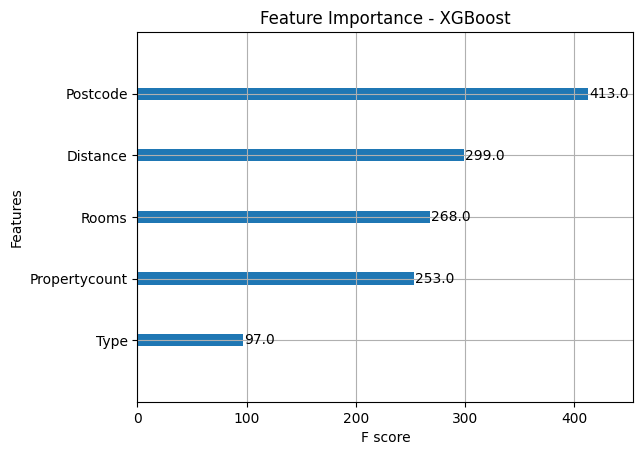

In [22]:
from xgboost import plot_importance

plot_importance(model)
plt.title("Feature Importance - XGBoost")
plt.show()

## 10. Make Predictions

In [23]:
# Example input: [Rooms, Type, Postcode, Distance, Propertycount]
# Type must be encoded (e.g., h=0, u=1, t=2)
sample_input = np.array([[3, 0, 3000, 10.2, 1000]])
predicted_price = model.predict(sample_input)
print(f"Predicted Price: ${predicted_price[0]:,.2f}")

Predicted Price: $1,472,830.00


## 11. Save Model

In [24]:
import joblib

joblib.dump(model, 'xgboost_house_price_model.pkl')
print("✅ Model saved as 'xgboost_house_price_model.pkl'")

✅ Model saved as 'xgboost_house_price_model.pkl'


## ✅ Conclusion

This notebook provides a complete end-to-end pipeline for **house price prediction using XGBoost**, based on the actual columns in your dataset.

The original dataset contains these columns:
- Suburb
- Address
- Rooms
- Type
- Price
- Method
- SellerG
- Date
- Postcode
- Regionname
- Propertycount
- Distance
- CouncilArea

We dropped some irrelevant columns and selected only the following for modeling:
- Rooms
- Type (encoded)
- Postcode
- Distance
- Propertycount
